# Logistic Regression

## Importing the modules

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## importing the dataset

In [3]:

X_train = pd.read_csv(r'D:\datas\excel\Day18\train_X.csv')
Y_train = pd.read_csv(r'D:\datas\excel\Day18\train_Y.csv')
X_test = pd.read_csv(r'D:\datas\excel\Day18\test_X.csv')
Y_test = pd.read_csv(r'D:\datas\excel\Day18\test_Y.csv')

X_train.head()

,Id,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,1
1,1,1,1,38.0,1,0,71.2833,0
2,2,3,1,26.0,0,0,7.9250,1
3,3,1,1,35.0,1,0,53.1000,1
4,4,3,0,35.0,0,0,8.0500,1


## cleaning the datas

In [4]:
X_train = X_train.drop("Id",axis=1)
Y_train = Y_train.drop("Id",axis=1)
X_test = X_test.drop("Id",axis=1)
Y_test = Y_test.drop("Id",axis=1)

## changing pandas values into numerical with numpy

In [5]:
X_train = X_train.values
Y_train = Y_train.values
Y_test = Y_test.values
X_test = X_test.values

## transpose

In [6]:
X_train = X_train.T
Y_train = Y_train.reshape(1,X_train.shape[1])

X_test = X_test.T
Y_test = Y_test.reshape(1,X_test.shape[1])

print("Shape of X_train : ",X_train.shape)
print("Shape of Y_train: ",Y_train.shape)
print("Shape of X_test : ",X_test.shape)
print("Shape of Y_test:  ",Y_test.shape)


Shape of X_train :  (7, 891)
Shape of Y_train:  (1, 891)
Shape of X_test :  (7, 418)
Shape of Y_test:   (1, 418)


## making the model

![WhatsApp Image 2023-06-23 at 14.11.29.jpg](<attachment:WhatsApp Image 2023-06-23 at 14.11.29.jpg>)
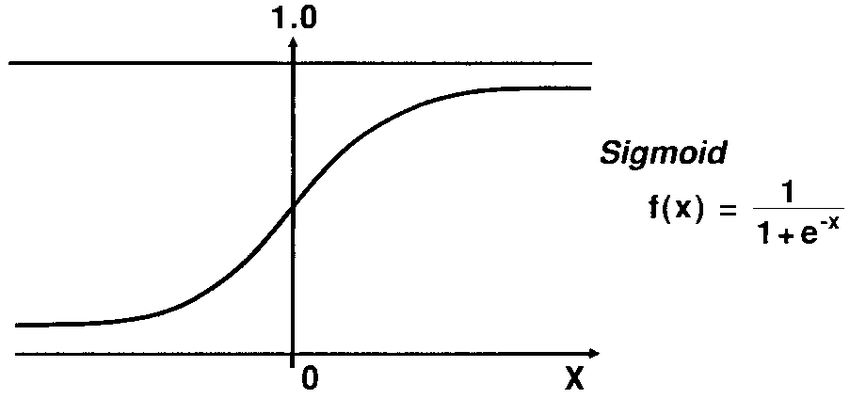

In [7]:
def sigmoid(X):
    return 1 / (1 + np.exp(-X))


In [8]:
cost_list = []

def model(X, Y, l_rate, iterations):
    m = X_train.shape[1]
    n = X_train.shape[0]

    W = np.zeros((n, 1))
    B = 0

    for i in range(iterations):
        Z = np.dot(W.T, X_train) + B
        A = sigmoid(Z)
        cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))

        dW = (1 / m) * np.dot(A - Y, X.T)
        dB = (1 / m) * np.sum(A - Y)
        W = W - l_rate * dW.T
        B = B - l_rate * dB
        cost_list.append(cost)

        if i % (iterations / 10) == 0:
            print("Cost after", i, "iteration is:", cost)

    return W, B

iterations = 100000
l_rate = 0.0015

W, B = model(X_train, Y_train, l_rate=l_rate, iterations=iterations)


Cost after 0 iteration is: 0.6931471805599454
Cost after 10000 iteration is: 0.49652777693895306
Cost after 20000 iteration is: 0.46674868550666
Cost after 30000 iteration is: 0.45687787762434423
Cost after 40000 iteration is: 0.45288994293089646
Cost after 50000 iteration is: 0.45093260252226425
Cost after 60000 iteration is: 0.4497708749009468
Cost after 70000 iteration is: 0.4489640829216279
Cost after 80000 iteration is: 0.44834126966124827
Cost after 90000 iteration is: 0.44783045246935776


## plotting Cost VS Iterations

![WhatsApp Image 2023-06-23 at 14.11.29.jpg](<attachment:WhatsApp Image 2023-06-23 at 14.11.29.jpg>)
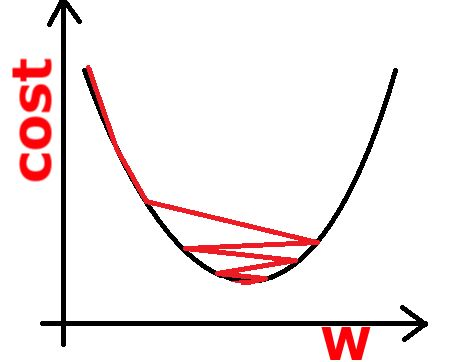

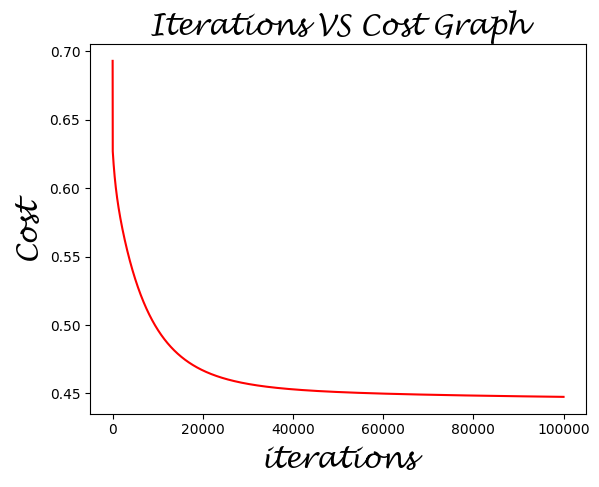

In [17]:
#plt.scatter(np.arange(iterations),cost_list)
plt.title("Iterations VS Cost Graph",fontname="Lucida Handwriting",fontsize='20')
plt.xlabel("iterations",fontname="Lucida Handwriting",fontsize='20')
plt.ylabel("Cost",fontname="Lucida Handwriting",fontsize='20')
plt.plot(np.arange(iterations),cost_list,'r')
plt.show()

## Accuracy

In [42]:
def accuracy(X,Y,W,B):
    Z=np.dot(W.T,X)+B
    A=sigmoid(Z)

    A = A >0.5
    A=np.array(A,dtype='int64')
    acc = (1-np.sum(np.absolute(A-Y))/Y.shape[1])*100

    print("the accuracy of the model is : ",acc,"%")

accuracy(X_test,Y_test,W,B)


the accuracy of the model is :  91.38755980861244 %
